In [1]:
using Pkg
if isfile("../Project.toml") && isfile("../Manifest.toml")
    Pkg.activate("..");
    ENV["PYTHON"] = "python3";
end

using JuliaProbo

  Activating environment at `~/Programming/julia/notebook/JuliaProbo/Project.toml`
┌ Info: Precompiling JuliaProbo [3c270a3a-2612-4193-9bf7-68cd93c8ae26]
└ @ Base loading.jl:1317


In [8]:
dt = 0.1
# environment
xlim = [-5.0, 5.0]
ylim = [-5.0, 5.0]
# id of landmark must start from 0 with 1 step
landmarks =
[Landmark([1.0, 4.0], 0), Landmark([4.0, 1.0], 1), Landmark([-4.0, -4.0], 2)]
envmap = Map()
push!(envmap, landmarks)
world = PuddleWorld(xlim, ylim)
push!(world, envmap)
# goal
goal = Goal(-3.0, -3.0)
push!(world, goal)
push!(world, Puddle([-2.0, 0.0], [0.0, 2.0], 0.1))
push!(world, Puddle([-0.5, -2.0], [2.5, 1.0], 0.1))
# robot side
initial_pose = [2.0, 2.0, 0.0]
# estimator = KalmanFilter(envmap, initial_pose)
estimator = Mcl(initial_pose, 100)
reso = [0.2, 0.2, pi / 18]
dp_agent = BeliefDP([0.2, 0.2, pi / 18], Goal(-3.0, -3.0); dt = 0.1)
# do this before initialization
push!(dp_agent.actions, [-1.0, 0.0])
sampling_num = 10
init_value(dp_agent)
init_policy(dp_agent)
init_depth(dp_agent, world, sampling_num = sampling_num)
init_state_transition_probs(dp_agent, sampling_num = sampling_num)
init_motion_sigma_transition_probs(dp_agent)
landmarks = [
    Landmark([1.0, 4.0], 0),
    Landmark([4.0, 1.0], 1),
    Landmark([-4.0, 1.0], 2),
    Landmark([-2.0, 1.0], 3),
]
camera = IdealCamera(landmarks)
init_obs_sigma_transition_probs(dp_agent, camera)
init_expected_depths(dp_agent, world)

In [3]:
for i in 1:200
    delta = value_iteration_sweep(dp_agent)
end

In [4]:
file = open("policy_amdp2.txt", "w")
indices = dp_agent.indices
for index in indices
    p = dp_agent.policy_[index..., :]
    write(file, "$(index[1]) $(index[2]) $(index[3]) $(index[4]) $(p[1]) $(p[2])\n")
end
close(file)

In [5]:
file = open("value_amdp2.txt", "w")
for index in indices
    v = dp_agent.value_function_[index...]
    write(file, "$(index[1]) $(index[2]) $(index[3]) $(index[4]) v\n")
end
close(file)

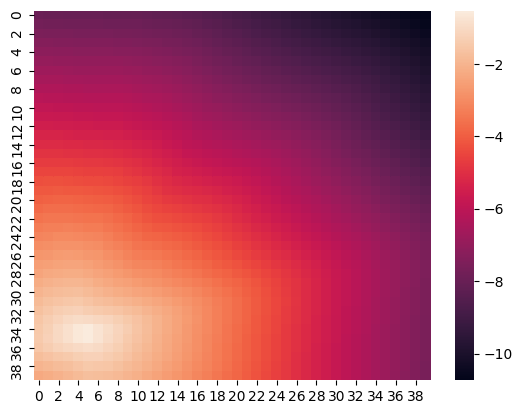

PyObject <AxesSubplot:>

In [7]:
v = dp_agent.value_function_[:, :, 20, 5]
import Seaborn
import PyPlot
Seaborn.heatmap(rotl90(v))
# PyPlot.savefig("images/ch12_amdp7.png")

<img src="images/ch12_amdp7.png">